# <span style="color:mediumslateblue; font-family:freestyle script; font-size:5em">Harmonisering:</span> <br><span style="color:greenyellow; font-family:freestyle script; font-size:4em">Faktoranalys</span>
***

# Innehållsförteckning
1. [Importera bibliotek](#1)
2. [Importera data](#2)
3. [Faktoranalys](#3)  
    3.1 [Bartlett](#3.1)  
    3.2 [Shapiro-Wilk](#3.2)  
    3.3 [Rotation](#3.3)  
    3.4 [Antal faktorer](#3.4)  
    3.5 [Faktorladdningar](#3.5)  
    3.6 [Kumulativ varians](#3.6)
4. [Referenser](#4)
***

# <a id = "1">1. Importera bibliotek</a>
De bibliotek som behövs i det här skriptet är **pandas**, **numpy**, **matplotlib.pyplot** och **FactorAnalyzer**.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from factor_analyzer import FactorAnalyzer

***
# <a id = "2">2. Importera data</a>
Läs in data från excelfil.

In [2]:
data = pd.read_excel('SLOSH och LNU medelvärden och n per SSYK för harmonisering.xlsx')
data.head(5)

,SSYK,z670_mean,z670_count,z671_mean,z671_count,z672_mean,z672_count,z673_mean,z673_count,z674_mean,...,Workinge_mean,Workinge_count,Worklear_mean,Worklear_count,Workrepe_mean,Workrepe_count,Workhow_mean,Workhow_count,Workwhat_mean,Workwhat_count
0,9,1.4,319.0,1.6,318.0,1.1,319.0,1.7,3.0,2.7,...,4.0,1.0,4.0,1.0,4.0,1.0,4.0,1.0,2.0,1.0
1,11,2.0,11.0,2.0,11.0,1.2,11.0,2.5,11.0,2.5,...,3.6,78.0,3.5,78.0,2.5,78.0,3.6,78.0,3.2,78.0
2,12,1.8,123.0,1.8,123.0,1.0,123.0,1.9,123.0,2.4,...,3.5,280.0,3.4,280.0,2.5,285.0,3.7,284.0,3.3,285.0
3,13,1.4,22.0,1.8,22.0,1.1,22.0,1.8,22.0,2.0,...,3.5,323.0,3.4,322.0,2.6,326.0,3.7,326.0,3.3,326.0
4,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.8,96.0,3.6,96.0,2.4,97.0,3.7,96.0,3.2,96.0


Använd SSYK-variabeln som index och ta bort de variabler som visar antal observationer (alltså varannan variabel).

In [3]:
data = data.set_index('SSYK')

data = data[data.columns[::2]]  

data.head(5)

,z670_mean,z671_mean,z672_mean,z673_mean,z674_mean,z680_mean,z681_mean,z682_mean,z616_mean,z624_mean,...,Workhard_mean,Workeffo_mean,Worktime_mean,Workcntr_mean,Workskil_mean,Workinge_mean,Worklear_mean,Workrepe_mean,Workhow_mean,Workwhat_mean
SSYK,,,,,,,,,,,,,,,,,,,,,
9,1.4,1.6,1.1,1.7,2.7,3.4,3.8,4.4,1.0,2.0,...,3.0,3.0,4.0,2.0,4.0,4.0,4.0,4.0,4.0,2.0
11,2.0,2.0,1.2,2.5,2.5,3.3,3.3,4.1,1.1,1.9,...,2.9,2.8,2.8,2.7,3.8,3.6,3.5,2.5,3.6,3.2
12,1.8,1.8,1.0,1.9,2.4,3.3,4.4,4.1,1.0,1.9,...,2.9,2.8,2.8,2.6,3.7,3.5,3.4,2.5,3.7,3.3
13,1.4,1.8,1.1,1.8,2.0,3.3,3.5,4.5,1.2,1.4,...,2.8,2.8,2.9,2.8,3.6,3.5,3.4,2.6,3.7,3.3
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.9,3.1,2.6,2.9,3.8,3.8,3.6,2.4,3.7,3.2


***
# <a id = "3">3. Faktoranalys</a>
Bartlett:s test genomförs för att se ifall det är lämpligt att utföra en faktoranalys på data. Vilken metod som är lämpligast för att utvinna faktorer avgörs av huruvida data är normalfördelad. Analysen kommer använda en oblique rotationsmetod. Antal faktorer som analysen ska omfatta fastställs med hjälp av Kaiser-kriteriet. Till sist analyseras faktorladdningarna och den kumulativa variansen.

***
## <a id = "3.1">3.1 Bartlett</a>
Tester visar ifall variablerna kovarierar över huvudtaget. Om resultat är statistiskt signifikant kovarierar variablerna och det är lämpligt att fortsätta med faktoranalysen   
[Läs mer om testet här](https://www.statisticshowto.datasciencecentral.com/bartletts-test/)

In [4]:
datatest = data.dropna()

from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity  

chi_square_value,p = calculate_bartlett_sphericity(datatest)

chi_square_value, p

alpha = 0.05

if p > alpha:
    print('Variablerna samvarierar inte (H0)')
else:
    print('Variablerna samvarierar (förkasta H0)')

Variablerna samvarierar (förkasta H0)


***
## <a id = "3.2">3.2 Shapiro-Wilk</a>
Undersök huruvida data är normalfördelad. Testet som används är Shapiro-Wilk, nollhypotesen säger att data är normalfördelad.  
  
[Läs mer om testet här](https://www.statisticshowto.datasciencecentral.com/shapiro-wilk-test/)  


In [5]:
from scipy.stats import shapiro

stat, p = shapiro(data)

alpha = 0.05

if p > alpha:
    print('Data verkar normalfördelad (H0)')
else:
    print('Data verkar inte normalfördelad (förkasta H0)')

Data verkar normalfördelad (H0)


***
## <a id = "3.3">3.3 Rotation</a>  
Faktoranalysen kommer använda en oblique rotation. Ortogonal rotation är lämpligt då faktorerna inte är korrelerade med varandra. Oblique rotation tillåter att faktorerna är korrelerade. Läs mer om val av metod för rotation i "Best Practices in Exploratory Factor Analysis: Four Recommendations for Getting the Most From Your Analysis " av Anna B. Costello och Jason W. Osborne.
>In the social sciences we generally expect some correlation among factors, since behavior is rarely partitioned into neatly packaged units that function independently of one another (s. 3)

***
## <a id = "3.4">3.4 Antal faktorer</a>
För att ta ställning till vilket antal faktorer som är lämpligt kommer Kaiser-kriteriet tillsammans med en Scree-plot användas. Kaiser-kritieriet säger att endast de faktorer med eigenvärde större än 1 är lämpliga. Börja med att inkludera ett stort antal faktorer.  

In [6]:
fa = FactorAnalyzer(n_factors = 25, rotation = 'promax', method = 'ml')

fa.fit(data)

FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
        method='ml', n_factors=25, rotation='promax', rotation_kwargs={},
        use_smc=True)

Ta fram egenvärden.

In [7]:
ev, v = fa.get_eigenvalues()
ev

array([1.17679312e+01, 6.56429892e+00, 3.61419520e+00, 2.37004982e+00,
       1.93935265e+00, 1.55021217e+00, 1.33641707e+00, 1.03172998e+00,
       8.71325822e-01, 6.13081915e-01, 4.97569308e-01, 4.41610360e-01,
       3.83224711e-01, 3.30289395e-01, 2.73180704e-01, 2.03984901e-01,
       1.82523599e-01, 1.62678570e-01, 1.50413562e-01, 1.35915130e-01,
       1.14813042e-01, 1.02964207e-01, 7.29729986e-02, 7.02644352e-02,
       5.19598766e-02, 3.52451479e-02, 3.25548281e-02, 2.96235342e-02,
       2.22502489e-02, 1.69648241e-02, 1.38766204e-02, 7.75227286e-03,
       5.01840414e-03, 2.73414393e-03, 1.02045058e-03])

Endast 8 av dessa eigenvärden är större än 1.

In [8]:
np.count_nonzero(ev>1)

8

Undersök nu Scree-ploten för att se att den nionde faktorn är mindre än 1.

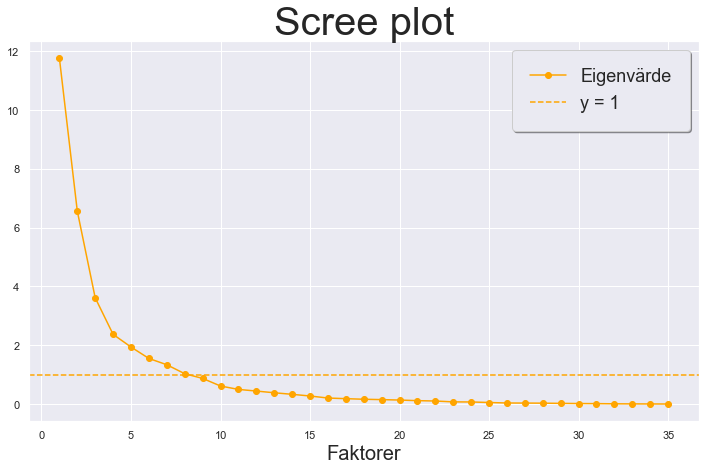

In [16]:
fig = plt.figure(figsize = (12, 7))

ax = plt.axes()

x = range(1, data.shape[1]+1)

y = ev

ax.plot(x, y, 'o', color ='orange', linestyle = 'solid', label = 'Eigenvärde')

ax.axhline(y = 1, color = 'orange', linestyle = 'dashed', label = 'y = 1')

ax.set_xlabel('Faktorer', fontsize = 20)

ax.set_title("Scree plot", fontsize = 40)

ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1, prop=dict(size=18))

import seaborn as sns
sns.set()

***
## <a id = "3.5">3.5 Faktorladdningar</a>
Undersök faktorladdningarna.

In [17]:
fa = FactorAnalyzer(n_factors = 8, rotation = 'promax', method = 'ml')

fa.fit(data) 

laddningar = pd.DataFrame.from_records(fa.loadings_)

laddningar = laddningar.set_index(data.columns)  

Det är ett stort antal variabler. Färgkoda laddningarna för att enklare se vilken riktning de har. Negativa laddningar är röda och positiva laddningar större än 0.2 är gröna. 

In [18]:
def färg(laddning):
  if laddning < 0:
    color = 'red'
  elif laddning > 0.2:
    color = 'green'
  else:
    color = 'black'

  return 'color: %s' % color
 
laddningar.style.applymap(färg)

,0,1,2,3,4,5,6,7
z670_mean,0.383957,0.0709747,-0.114284,0.837365,-0.104409,0.0776068,-0.268391,0.30622
z671_mean,0.131635,0.167887,-0.165489,0.512746,-0.0957878,0.0606383,0.23376,0.625408
z672_mean,-1.04649,-0.0987492,0.143273,0.0234727,0.0743692,-0.0117593,-0.163375,-0.00286213
z673_mean,-0.203308,-0.0317182,0.00493187,1.06549,-0.0138878,0.0114831,-0.116038,0.349653
z674_mean,0.601275,-0.0303414,0.0332876,0.179726,0.0258166,-0.064047,-0.096308,0.388859
z680_mean,-0.689418,-0.0826551,0.0432139,-0.38458,0.0235739,0.0295583,-0.131041,-0.222927
z681_mean,0.956819,0.0774997,-0.0428137,0.237983,-0.10644,-0.0239238,-0.170092,-0.388711
z682_mean,-0.332941,0.150683,-0.0958777,-0.829864,-0.0349512,-0.0453779,0.0332087,0.112312
z616_mean,-0.546776,0.062405,-0.0582994,0.199282,-0.0927236,-0.0481314,-0.113565,0.0251788
z624_mean,1.01382,-0.0790054,-0.0484902,0.137021,0.0140708,-0.0295433,0.208442,-0.0961946


Det går även att isolera de laddningar som antingen är större än 0.5 eller mindre än -0.5. Möjligen blir det enklare att analysera laddningarna då.

In [19]:
laddningar[(laddningar > 0.5) | (laddningar < -0.5)]

,0,1,2,3,4,5,6,7
z670_mean,NaN,NaN,NaN,0.837365,NaN,NaN,NaN,NaN
z671_mean,NaN,NaN,NaN,0.512746,NaN,NaN,NaN,0.625408
z672_mean,-1.046487,NaN,NaN,NaN,NaN,NaN,NaN,NaN
z673_mean,NaN,NaN,NaN,1.065489,NaN,NaN,NaN,NaN
z674_mean,0.601275,NaN,NaN,NaN,NaN,NaN,NaN,NaN
z680_mean,-0.689418,NaN,NaN,NaN,NaN,NaN,NaN,NaN
z681_mean,0.956819,NaN,NaN,NaN,NaN,NaN,NaN,NaN
z682_mean,NaN,NaN,NaN,-0.829864,NaN,NaN,NaN,NaN
z616_mean,-0.546776,NaN,NaN,NaN,NaN,NaN,NaN,NaN
z624_mean,1.013816,NaN,NaN,NaN,NaN,NaN,NaN,NaN


***
## <a id = "3.6">3.6 Kumulativ varians</a>  
Den kumulativa variansen säger att åtta faktorer förklarar ungefär 87% av variansen i data. Den första faktorn förklara 26% medan den åttonde endast förklarar 4%.

In [20]:
fa.get_factor_variance()

kumulativ = pd.DataFrame.from_records(fa.get_factor_variance()).iloc[1:, :]

Statistik = (['Förklarad varians per faktor', 'Kumulativ förklarad varians'])  

kumulativ['Statistik'] = Statistik

kumulativ = kumulativ.set_index('Statistik')  

kumulativ

,0,1,2,3,4,5,6,7
Statistik,,,,,,,,
Förklarad varians per faktor,0.262086,0.153752,0.127283,0.126840,0.057517,0.050767,0.048760,0.040384
Kumulativ förklarad varians,0.262086,0.415838,0.543121,0.669961,0.727478,0.778245,0.827005,0.867389


***
# <a id = "4">4. Referenser</a>  
* Costello, Anna B. & Jason Osborne (2005). Best practices in exploratory factor analysis: four
recommendations for getting the most from your analysis. Practical Assessment Research & Evaluation, 10(7).
Available online: http://pareonline.net/getvn.asp?v=10&n=7  
  
  
* [FactorAnalyzer](https://factor-analyzer.readthedocs.io/en/latest/factor_analyzer.html)

***
**Kontakt:** [Marcus Brafors](https://www.su.se/profiles/mabr4821-1.403903)